# Session 2c: Classification

Next, we will introduce the task of classification, and look at a naive way of doing it using a method called k-Nearest Neighbors.

## Classification

Consider the following small dataset:

In [2]:
import numpy as np
from IPython.display import HTML, display
import tabulate
import matplotlib.pyplot as plt

# toy datast of whether or not it will be rainy or sunny
feature_names = ["Humidity (%)", "Pressure (kPa)"]
data = [[29, 101.7], [60, 98.6], [40, 101.1], [62, 99.9], [39, 103.2], [51, 97.6], [46, 102.1], [55, 100.2]]
labels = ["Sun","Rain","Sun","Rain","Sun","Rain","Sun","Rain"]

# display table
table_labels = np.array(['class']+feature_names).reshape((1, 1+len(feature_names)))
table_data = np.concatenate([np.array(labels).reshape(len(data), 1), data], axis=1)
table_full = np.concatenate([table_labels, table_data], axis=0)
display(HTML(tabulate.tabulate(table_full, tablefmt='html')))

class,Humidity (%),Pressure (kPa)
Sun,29.0,101.7
Rain,60.0,98.6
Sun,40.0,101.1
Rain,62.0,99.9
Sun,39.0,103.2
Rain,51.0,97.6
Sun,46.0,102.1
Rain,55.0,100.2


We can plot these points on a scatterplot. In the following, a `+` means "Rain" and a `-` is "Sun" (no rain).

![classification](http://ml4a.github.io/images/lin_classifier_2d.png)

Classification is defined as the task of predicting the correct label or category of an unknown point. With two classes, we divide the data space into two halves, one for each class. So when we receive a new point, we simply find which side of the partition the point is in.

![classification](http://ml4a.github.io/images/lin_classifier_2d_newpt.png)

## k-nearest neighbors classification

We will introduce a simple technique for classification called k-nearest neighbors classification (kNN). Before doing that, we are going to scale up our problem with a slightly more realistic dataset called [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set), which is commonly used to introduce data science tasks.

Iris is a dataset containing 150 samples of flowers of the Iris genus, belonging to three different species (Iris setosa, Iris virginica, Iris versicolor). The dataset records their species (which is the class label), along with the following features: Petal Length, Petal Width, Sepal Length, and Sepal width. 

In the next cell, we import the dataset, and shuffle it.

In [7]:
import numpy as np
from sklearn.datasets import load_iris

# load iris and grab our data and labels
iris = load_iris()
labels, data = iris.target, iris.data

num_samples = len(labels)  # size of our dataset
num_features = len(iris.feature_names)  # number of columns/variables

# shuffle the dataset
shuffle_order = np.random.permutation(num_samples)
data = data[shuffle_order, :]
labels = labels[shuffle_order]


Let's view a table showing the first 20 samples.

In [8]:
label_names = np.array([iris.target_names[l] for l in labels])
table_labels = np.array(['class']+iris.feature_names).reshape((1, 1+num_features))
class_names = iris.target_names
table_data = np.concatenate([np.array(label_names).reshape(num_samples, 1), data], axis=1)[0:20]

# display table
table_full = np.concatenate([table_labels, table_data], axis=0)
display(HTML(tabulate.tabulate(table_full, tablefmt='html')))


class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,4.6,3.4,1.4,0.3
setosa,5.1,3.3,1.7,0.5
virginica,6.4,2.8,5.6,2.2
virginica,6.0,2.2,5.0,1.5
virginica,6.9,3.1,5.4,2.1
versicolor,6.0,2.2,4.0,1.0
virginica,5.8,2.8,5.1,2.4
versicolor,5.6,2.5,3.9,1.1
virginica,6.4,2.8,5.6,2.1
versicolor,6.1,2.8,4.7,1.2


For simplicity, we will restrict our attention to just the first two features, sepal width and sepal length. Let's plot the dataset.

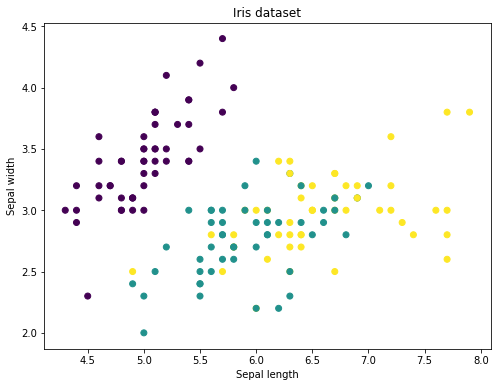

In [9]:
# plot the original data
x, y, lab = data[:, 0], data[:, 1], labels

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=lab)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')


Suppose we are given a new point whose sepal length (`x`) and sepal width (`y`) are the following:

In [10]:
new_x, new_y = 6.5, 3.7

Let's plot it on the graph. What could its class be?

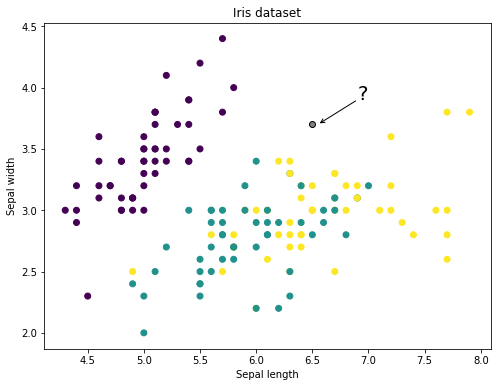

In [11]:
# plot the original data
x, y, lab = data[:, 0], data[:, 1], labels

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=lab)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')

# put the new point on top
plt.scatter(new_x, new_y, c='grey', cmap=None, edgecolor='k')
plt.annotate('?', (new_x+0.45, new_y+0.25), fontsize=20, horizontalalignment='center', verticalalignment='center')
plt.annotate("", xytext=(new_x+0.4, new_y+0.2), xy=(new_x+0.05, new_y), arrowprops=dict(arrowstyle="->"))


Our simple approach to predicting the new point's label is to find the point in the dataset which is closest to the new point, and copying its label.

In [12]:
# calculate the distance between the new point and each of the points in our labeled dataset
distances = np.sum((data[:,0:2] - [new_x, new_y])**2, axis=1)

# find the index of the point whose distance is lowest
closest_point = np.argmin(distances)

# take its label
new_label = labels[closest_point]

print('Predicted label: %d'%new_label)

Predicted label: 2


That's it! That is k-nearest neighbors where we set `k = 1`. If `k > 1`, we find the `k` closest points and take a vote among them.

We can now plot the newly-labeled point on top of the dataset.

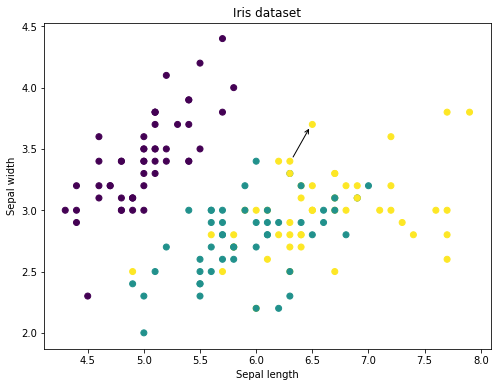

In [13]:
# append the newly labeled point in our dataset
x = np.append(x, new_x)
y = np.append(y, new_y)
lab = np.append(lab, new_label)

# scatter plot as before
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=lab)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')
plt.annotate("", xytext=(x[closest_point]+0.02, y[closest_point]+0.02), xy=(new_x-0.02, new_y-0.02), arrowprops=dict(arrowstyle="->"))


How accurate is k-nearest neighbors? We can answer this question with an experiment. Let's split the dataset into two: what we will call a "training set" and a "test set". For each point in the test set, we will find the closest point from the training set, and copy its label as our prediction for the test point. We will then compare our predictions to the actual labels in the test set, and measure our accuracy.

In [14]:
# how many samples to keep in the training set
n_train = 100

# split our dataset into training and test sets
train_data, train_labels = data[:n_train, 0:2], labels[:n_train]
test_data, test_labels = data[n_train:, 0:2], labels[n_train:]

Let's plot the reduced training set.

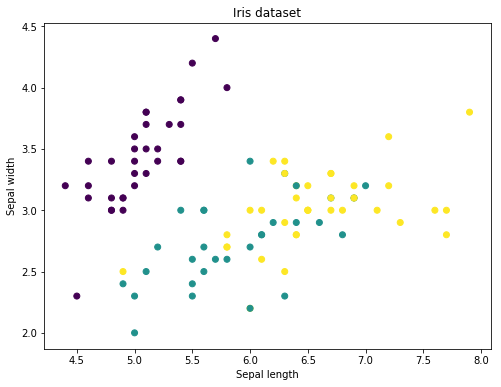

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')

Now let's plot the unknown points on top of it. They are colored black.

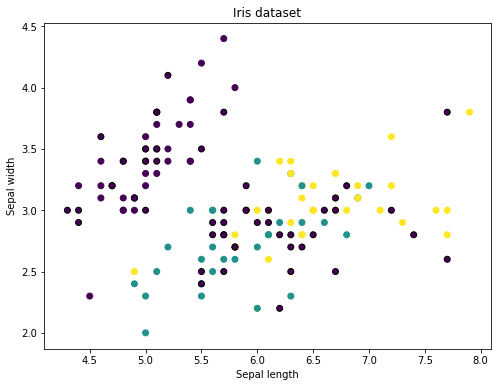

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')
plt.scatter(test_data[:,0], test_data[:,1], c=[0]*len(test_labels), cmap=None, edgecolor='k')

Let's repeat our procedure from above, where we calculate the distances between each test point and each training point.

In [17]:
# list of each set of distances between each point in the test set and each point in the training set
distances = [ np.sum((train_data[:,0:2] - [x[0],x[1]])**2, axis=1) for x in test_data ]

# for each point in the test set, take the index in the training set of the point closest to it
closest_points = [ np.argmin(distance) for distance in distances ]

# copy the labels of those closest points as our prediction
new_labels = [train_labels[c] for c in closest_points]

How did we do?

In [18]:
results = (new_labels == test_labels)
num_correct = sum(results)
accuracy = num_correct / len(results)
print("accuracy %0.2f" % accuracy)

accuracy 0.68


Our accuracy is 68%. Not too bad for such a simple method.

Let's try it for a more complicated dataset. MNIST

Not so good. 

What are the pros and cons of nearest-neighbor search?



We will need something better: neural network.

First let's introduce regression
